In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from scipy.linalg import LinAlgError
from scipy import stats
from scipy.stats import gaussian_kde, norm
import plotly.express as px
import plotly.graph_objects as go


import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error
from numpy import log
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")



In [ ]:
df=pd.read_csv(r"/content/GlobalLandTemperaturesByCountry.csv")

In [ ]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [ ]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [ ]:
df.tail()


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


In [ ]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [ ]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [ ]:
df=pd.read_csv("/content/GlobalLandTemperaturesByCountry.csv",parse_dates=['dt'])
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [ ]:
df['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [ ]:
country_list = ['Canada', 'Brazil', 'Congo', 'India', 'United Kingdom', 'United States', 'Swaziland', 'Italy', 'Europe', 'France', 'Japan', 'Russia']
df['Year'] = df['dt'].dt.year
df['Month'] = df['dt'].dt.month
df=df.set_index('dt')

In [ ]:
df_country=df[df['Country'].isin(country_list)]
df_copy = df_country.copy()
df_copy.fillna(method='ffill', inplace=True)
df_copy

,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month
dt,,,,,
1832-01-01,24.935,1.372,Brazil,1832,1
1832-02-01,24.505,1.953,Brazil,1832,2
1832-03-01,24.617,1.359,Brazil,1832,3
1832-04-01,23.990,2.013,Brazil,1832,4
1832-05-01,23.124,1.592,Brazil,1832,5
...,...,...,...,...,...
2013-05-01,14.073,0.178,United States,2013,5
2013-06-01,20.198,0.236,United States,2013,6
2013-07-01,22.074,0.152,United States,2013,7


<Axes: xlabel='dt'>

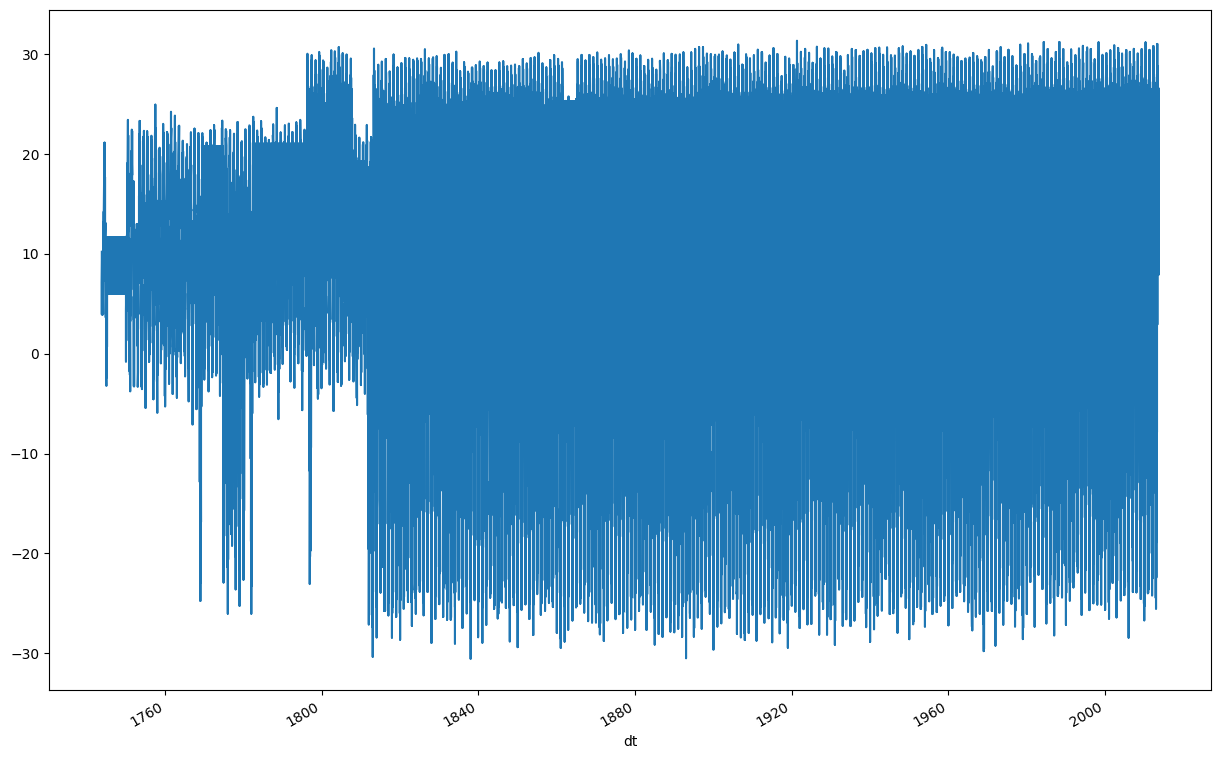

In [ ]:
df_copy['AverageTemperature'].plot(figsize=(15,10))

In [ ]:
#Augmented dickey fuller test for stationarity check

d=df_copy['AverageTemperature'].values
fuller_test= adfuller(d)
fuller_out=pd.Series(fuller_test[0:4],index=['Test Stats','p-value','Lags used','No. of observations used'])
print(fuller_out)
for key,value in fuller_test[4].items():
    print('\t%s: %.3f' %(key,value))

if fuller_test[0]<fuller_test[4]['5%']:
    print('Reject H0 - Time series is stationary')
else:
    print('Failed to Reject H0 - Time series is not stationary')

Test Stats                     -3.721231
p-value                         0.003824
Lags used                      51.000000
No. of observations used    31848.000000
dtype: float64
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject H0 - Time series is stationary




*   The test statistic is -3.721231. It's a negative value and is compared to critical values to determine the stationarity.
*  The p-value is 0.003824 , which is less than 0.05.i.e.,fail to reject the null hypothesis.
* The data might have some trends or seasonality patterns that need to be addressed before using certain time series models that assume stationarity.






In [ ]:
df_copy.describe()

,AverageTemperature,AverageTemperatureUncertainty,Year,Month
count,31900.000000,31900.000000,31900.000000,31900.000000
mean,11.448072,1.166606,1898.140313,6.497179
std,11.905859,1.360683,70.736992,3.451312
min,-30.577000,0.053000,1743.000000,1.000000
25%,5.281000,0.256000,1845.000000,3.000000
50%,12.992500,0.583000,1902.000000,6.000000
75%,20.748250,1.645000,1958.000000,9.000000
max,31.329000,12.564000,2013.000000,12.000000


In [ ]:
data=pd.pivot_table(df_copy,index='Year', columns='Country',values='AverageTemperature',aggfunc='mean')
data

Country,Brazil,Canada,Congo,Europe,France,India,Italy,Japan,Russia,Swaziland,United Kingdom,United States
Year,,,,,,,,,,,,
1743,NaN,NaN,NaN,3.942000,10.203000,NaN,9.538000,NaN,NaN,NaN,7.086000,NaN
1744,NaN,NaN,NaN,8.707250,13.189333,NaN,13.482833,NaN,NaN,NaN,8.955250,NaN
1745,NaN,NaN,NaN,4.100250,10.431250,NaN,9.186250,NaN,NaN,NaN,5.650167,NaN
1746,NaN,NaN,NaN,6.013000,11.672000,NaN,10.728000,NaN,NaN,NaN,6.450000,NaN
1747,NaN,NaN,NaN,6.013000,11.672000,NaN,10.728000,NaN,NaN,NaN,6.450000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2009,25.600583,-4.135083,25.349250,9.150333,13.941667,25.146667,14.052917,12.933833,-4.608500,19.293000,9.453333,9.137083
2010,25.812417,-1.887917,25.559417,8.279833,13.115417,25.050833,13.324917,13.215583,-4.520583,19.756333,8.394333,9.505583
2011,25.428917,-3.557083,24.775083,9.384417,14.479583,24.415583,14.173167,12.737750,-3.401583,19.359000,9.907917,9.549917


In [ ]:
df_copy.isnull().sum()

AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
Year                             0
Month                            0
dtype: int64

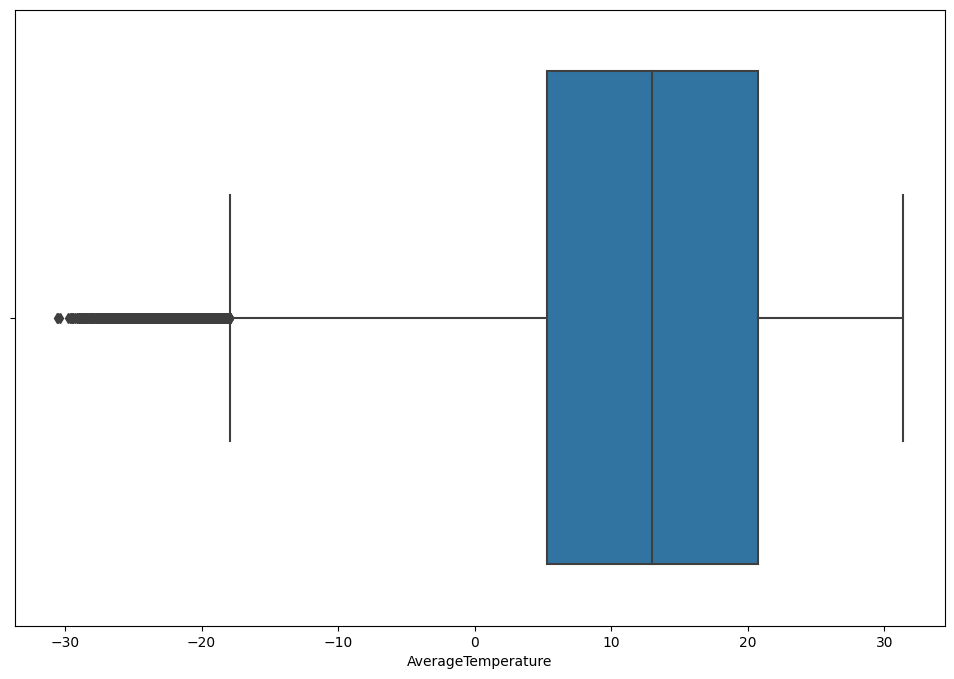

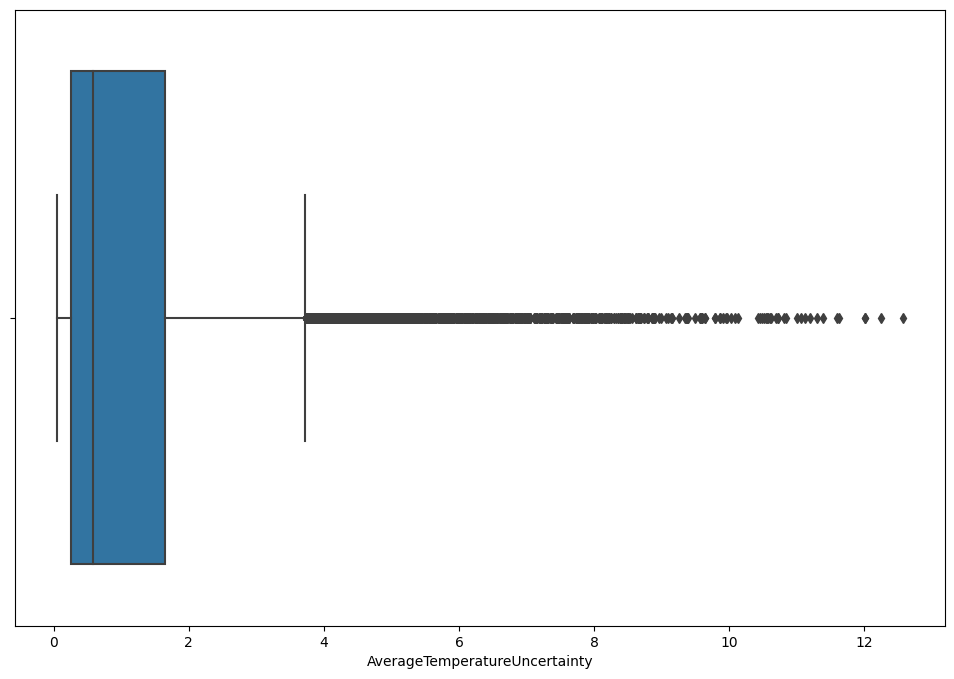

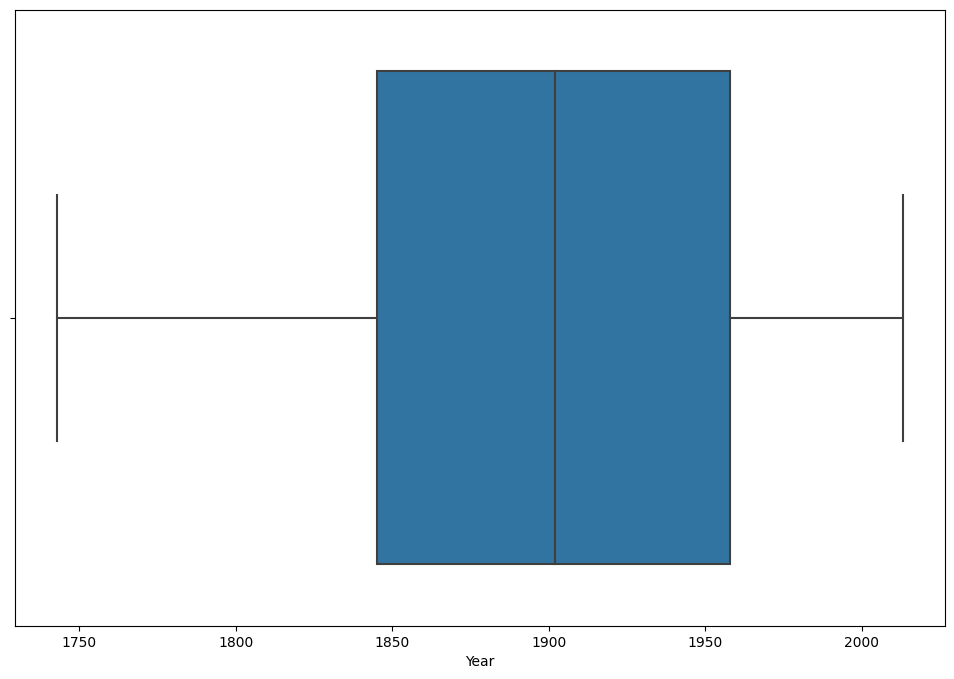

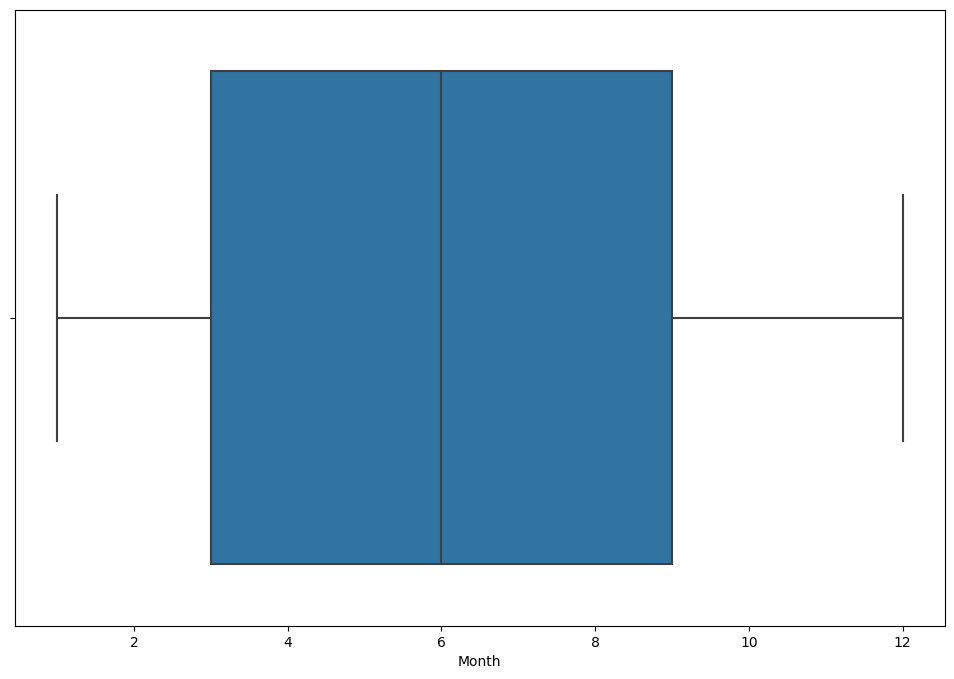

In [ ]:
a=['AverageTemperature','AverageTemperatureUncertainty','Year','Month']
for i in a:
  sns.boxplot(data=df_copy,x=i)
  plt.show()

In [ ]:
for i in a:
    Q1=np.percentile(df_copy[i],25,interpolation="midpoint")
    Q3=np.percentile(df_copy[i],75,interpolation="midpoint")

    IQR=Q3-Q1
    low=Q1-1.5*IQR
    up=Q3+1.5*IQR

    for j in df_copy[i]:
        if j<low:
            df_copy[i]=df_copy[i].replace(j,low)
        elif j>up:
            df_copy[i]=df_copy[i].replace(j,up)

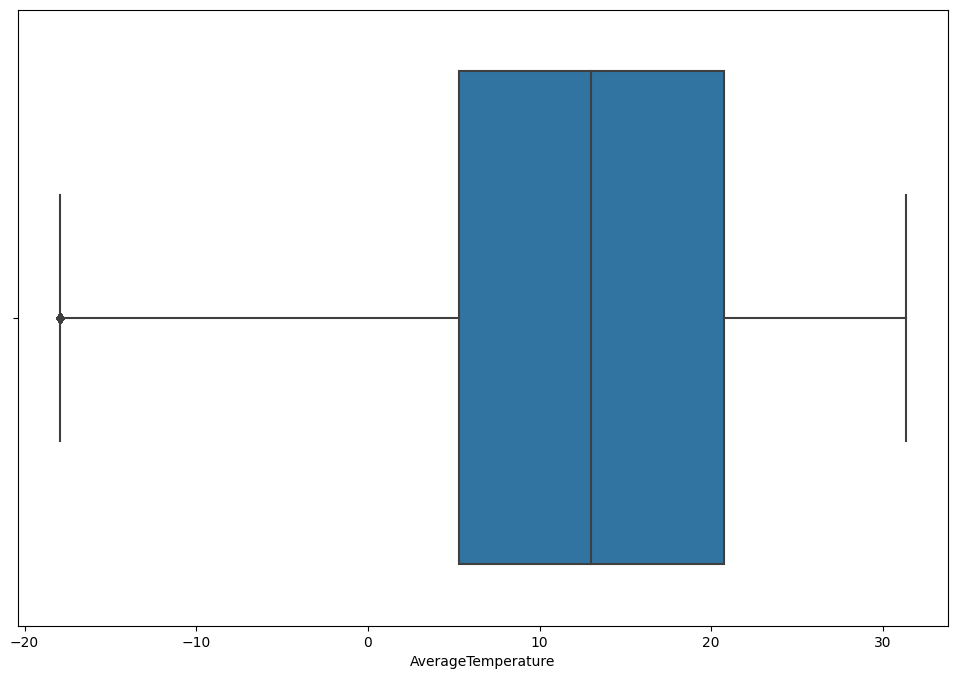

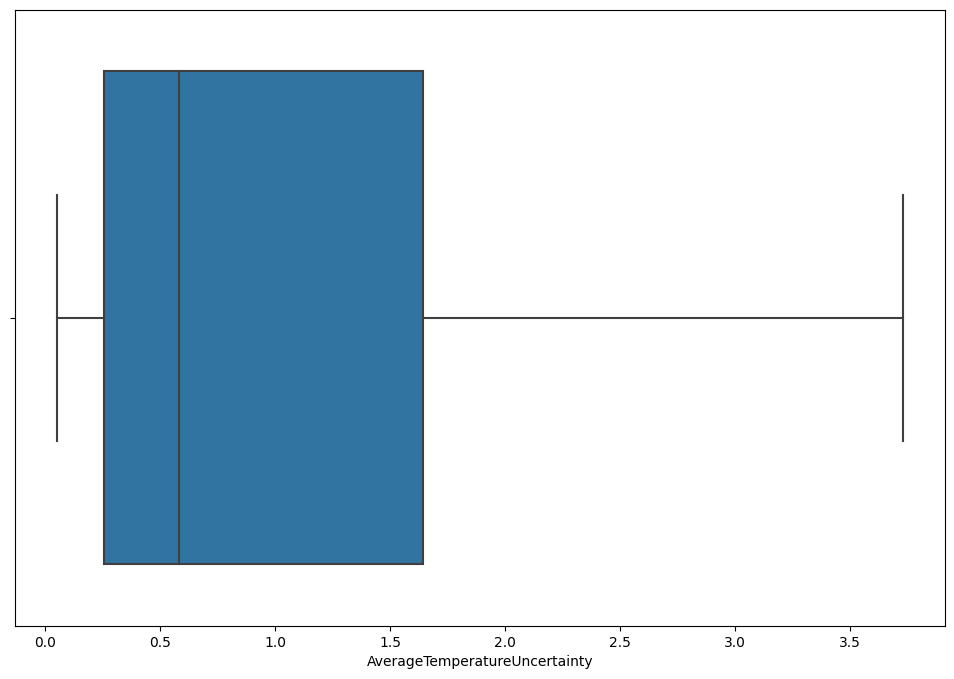

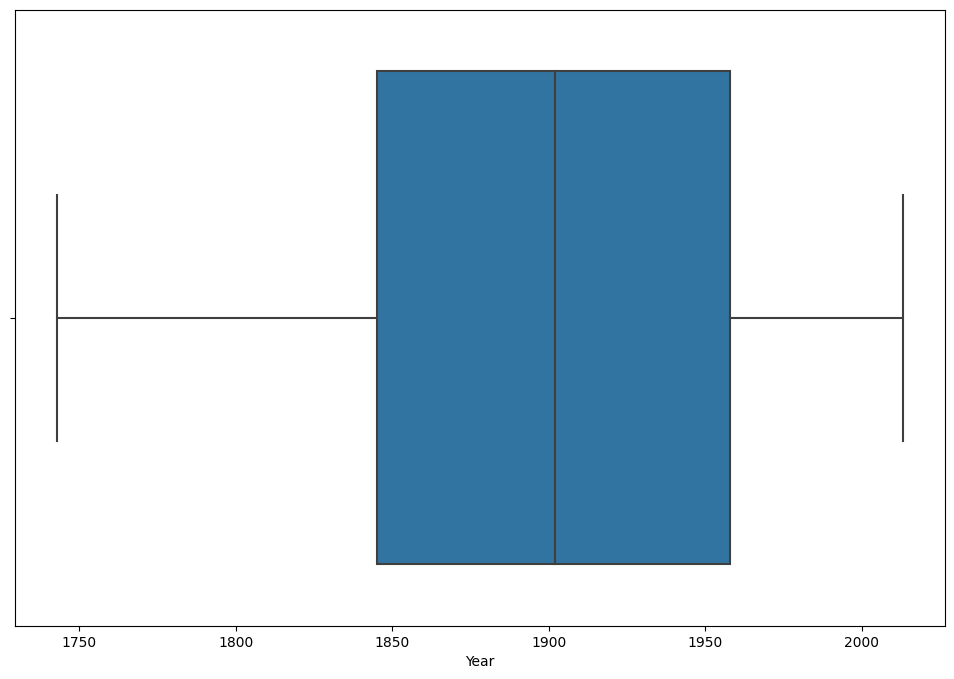

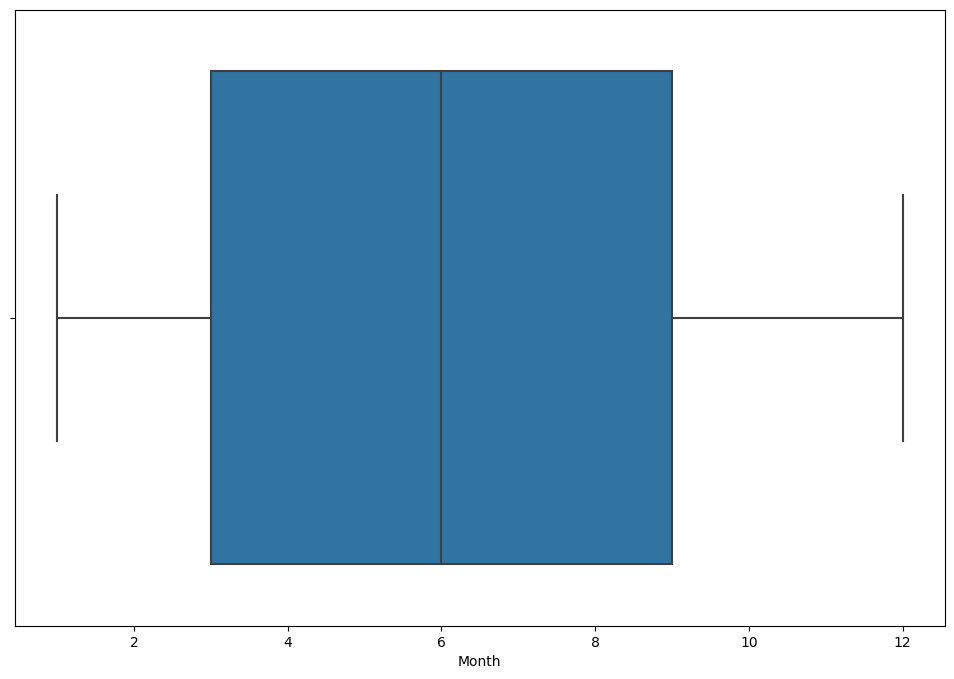

In [ ]:
for i in a:
  sns.boxplot(data=df_copy,x=i)
  plt.show()

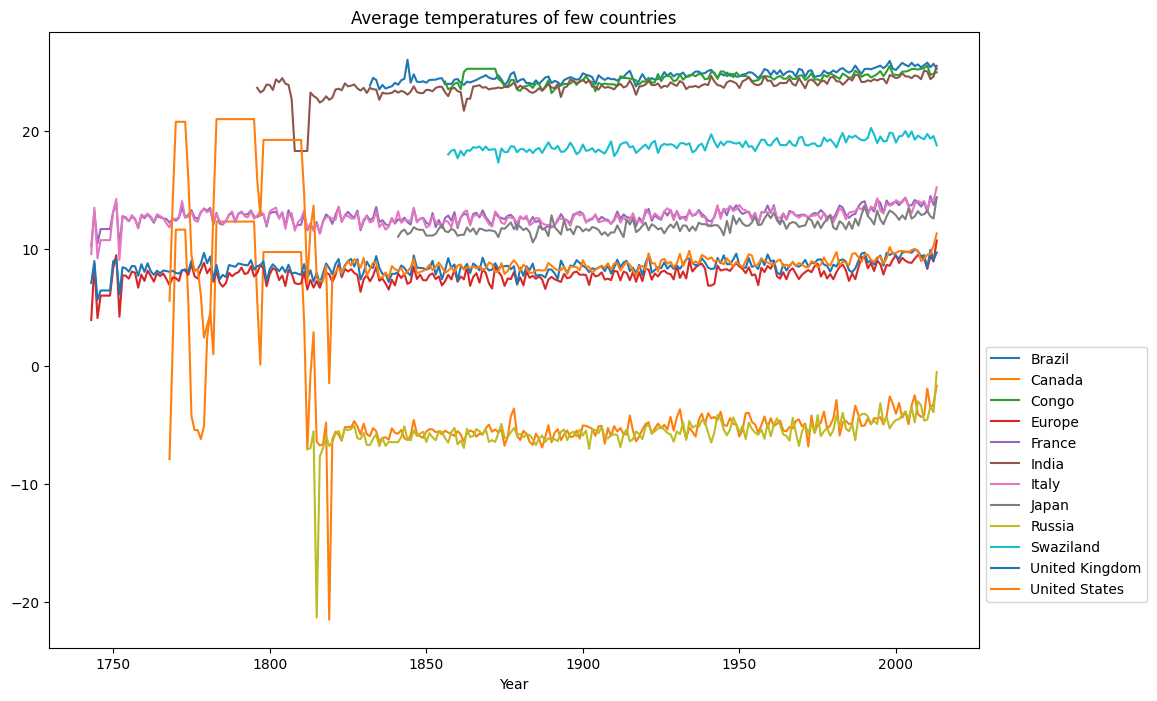

In [ ]:
data.plot()
plt.title('Average temperatures of few countries')
plt.rcParams["figure.figsize"] = (20,12)
plt.legend(bbox_to_anchor =(1, 0.5))

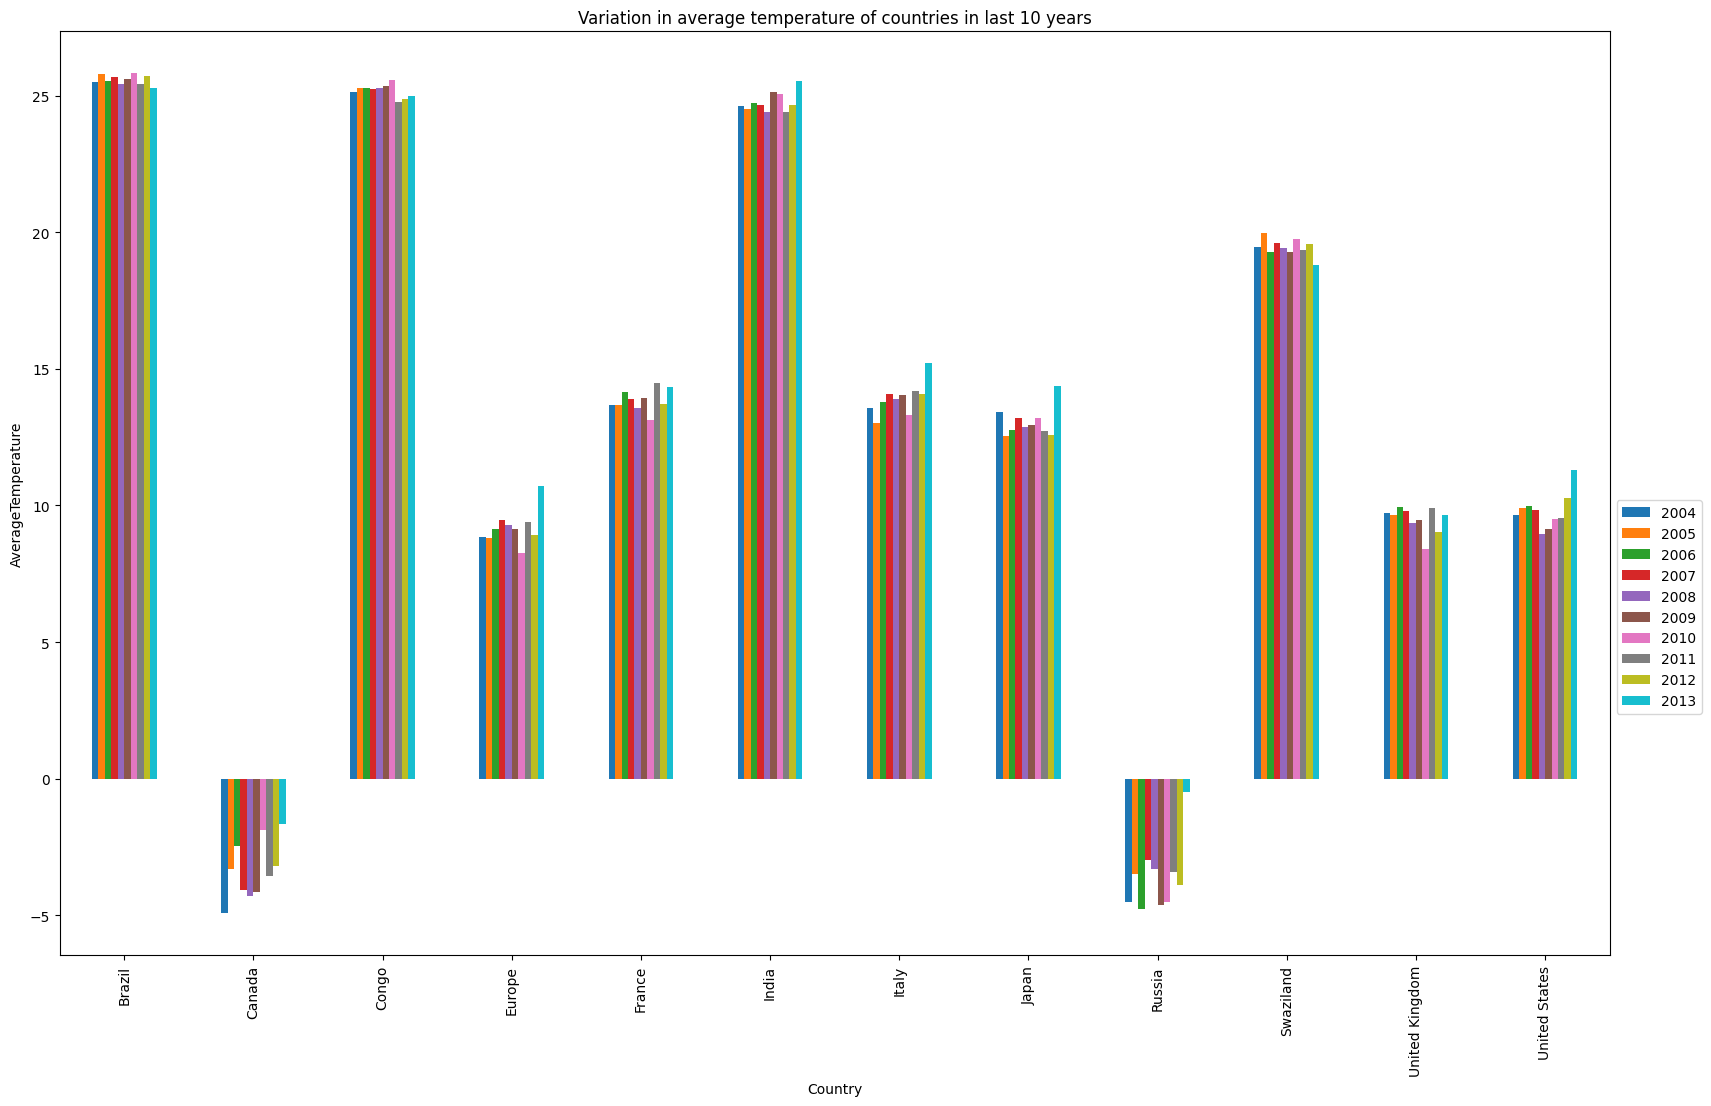

In [ ]:
ax = data[-10:].T.plot(kind='bar', ylabel='AverageTemperature')
plt.title('Variation in average temperature of countries in last 10 years')
plt.rcParams["figure.figsize"] = (12,8)
plt.legend(bbox_to_anchor=(1,0.5))


In [ ]:
countries=pd.read_csv(r"/content/GlobalLandTemperaturesByCountry.csv",parse_dates=['dt'])
india=df_copy.loc[df_copy['Country']=='India',['Year','AverageTemperature']]
india.columns=['year','AvgTemp']
india=india.groupby(pd.Grouper(freq='Y')).mean()
india['year']=india.index.year
india


,year,AvgTemp
dt,,
1796-12-31,1796,23.675250
1797-12-31,1797,23.280750
1798-12-31,1798,23.449083
1799-12-31,1799,23.949417
1800-12-31,1800,23.911917
...,...,...
2009-12-31,2009,25.146667
2010-12-31,2010,25.050833
2011-12-31,2011,24.415583


In [ ]:
fig = px.scatter(df_copy, x='Year', y='AverageTemperature')
fig.show()

ANOMALY DETECTION

In [ ]:
max_features=1.0
n_estimators=100
max_samples='auto'
contamination=float(0.13)
forest_model=IsolationForest(max_features = max_features, n_estimators=n_estimators, max_samples=max_samples, contamination=contamination)
forest_model.fit(df_copy[['AverageTemperature']].values)
df_copy['scores']=forest_model.decision_function(df_copy[['AverageTemperature']].values)
df_copy['anomaly_value']=forest_model.predict(df_copy[['AverageTemperature']].values)
print(df_copy.head(10))
print("Anomaly Values")
print(df_copy['anomaly_value'].value_counts())

            AverageTemperature  AverageTemperatureUncertainty Country  Year  \
dt                                                                            
1832-01-01              24.935                          1.372  Brazil  1832   
1832-02-01              24.505                          1.953  Brazil  1832   
1832-03-01              24.617                          1.359  Brazil  1832   
1832-04-01              23.990                          2.013  Brazil  1832   
1832-05-01              23.124                          1.592  Brazil  1832   
1832-06-01              22.924                          1.528  Brazil  1832   
1832-07-01              22.974                          1.930  Brazil  1832   
1832-08-01              22.741                          1.568  Brazil  1832   
1832-09-01              23.560                          1.996  Brazil  1832   
1832-10-01              24.718                          1.592  Brazil  1832   

            Month    scores  anomaly_value  
dt    



* The majority of the data points (28956 instances) which are considered as inliers or normal data points.
* A smaller subset of the data points (2944 instances) which are considered as outliers or anomalies.





In [ ]:
a_df = df_copy.query('anomaly_value == -1')
# plotting the graph for outliers
normal = go.Scatter(x=df_copy.index.astype(str),y=df_copy['AverageTemperature'],name="Dataset",mode='markers')
outlier = go.Scatter(x=a_df.index.astype(str),y=a_df['AverageTemperature'],name="Anomalies",mode='markers',
                marker=dict(color='red', size=6,
                            line=dict(color='red', width=1)))

# labeling the graph
layout = go.Layout(title="Isolation Forest",yaxis_title='Percent_Positive',xaxis_title='Year',)

# plotting
data = [normal, outlier]
fig = go.Figure(data=data, layout=layout)
fig.show()



*  The plot helps to visually identify where anomalies occur within the time series data.
*  The red markers provide insights into potential outliers or unusual temperature fluctuations that might need further investigation.



In [ ]:


t=india['AvgTemp'].values
fuller_test= adfuller(t)
fuller_out=pd.Series(fuller_test[0:4],index=['Test Stats','p-value','Lags used','No. of observations used'])
print(fuller_out)
for key,value in fuller_test[4].items():
    print('\t%s: %.3f' %(key,value))

if fuller_test[0]<fuller_test[4]['5%']:
    print('Reject H0 - Time series is stationary')
else:
    print('Failed to Reject H0 - Time series is not stationary')

Test Stats                   -2.794173
p-value                       0.059111
Lags used                     6.000000
No. of observations used    211.000000
dtype: float64
	1%: -3.462
	5%: -2.875
	10%: -2.574
Failed to Reject H0 - Time series is not stationary



* Since the p-value is higherthan 0.05 there isn't enough evidence to reject the null hypothesis.  

* The "Failed to Reject H0" outcome suggests that the time series data does not meet the criteria for stationarity.  
* Non-stationarity indicates that the average temperatures in India exhibit trends or patterns that change over time.







In [ ]:
#Rolling Statistics test for India temperature
test=pd.DataFrame()
test['year']=india['year']
test['AvgTemp']=india['AvgTemp']
test=test.set_index('year')
print(test)
rollmean=test.rolling(window=12).mean()
rollstd=test.rolling(window=12).std()
print(rollmean,'\n', rollstd)

        AvgTemp
year           
1796  23.675250
1797  23.280750
1798  23.449083
1799  23.949417
1800  23.911917
...         ...
2009  25.146667
2010  25.050833
2011  24.415583
2012  24.640833
2013  25.540111

[218 rows x 1 columns]
        AvgTemp
year           
1796        NaN
1797        NaN
1798        NaN
1799        NaN
1800        NaN
...         ...
2009  24.676896
2010  24.701514
2011  24.681160
2012  24.693062
2013  24.772912

[218 rows x 1 columns] 
        AvgTemp
year          
1796       NaN
1797       NaN
1798       NaN
1799       NaN
1800       NaN
...        ...
2009  0.199208
2010  0.226217
2011  0.240825
2012  0.234393
2013  0.334795

[218 rows x 1 columns]




* The rolling standard deviation shows how much the temperature varies around the rolling mean in a 1-year window.  




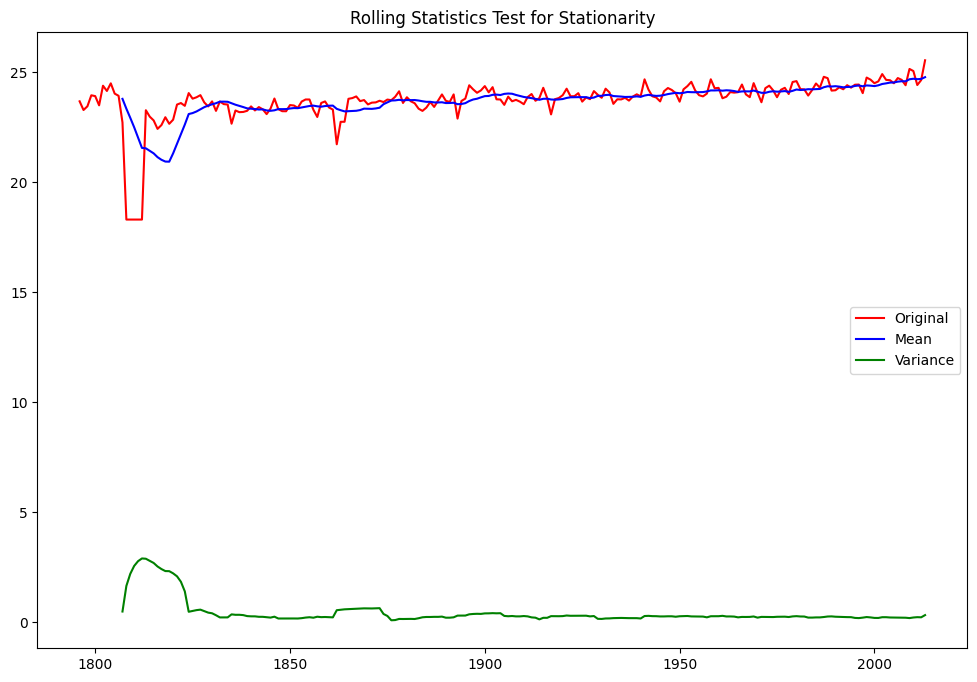

In [ ]:
original=plt.plot(test,color='red',label='Original')
mean=plt.plot(rollmean,color='blue',label='Mean')
std=plt.plot(rollstd,color='green',label='Variance')
plt.rcParams["figure.figsize"]=(10,6)
plt.legend(loc='best')
plt.title('Rolling Statistics Test for Stationarity')
plt.show()


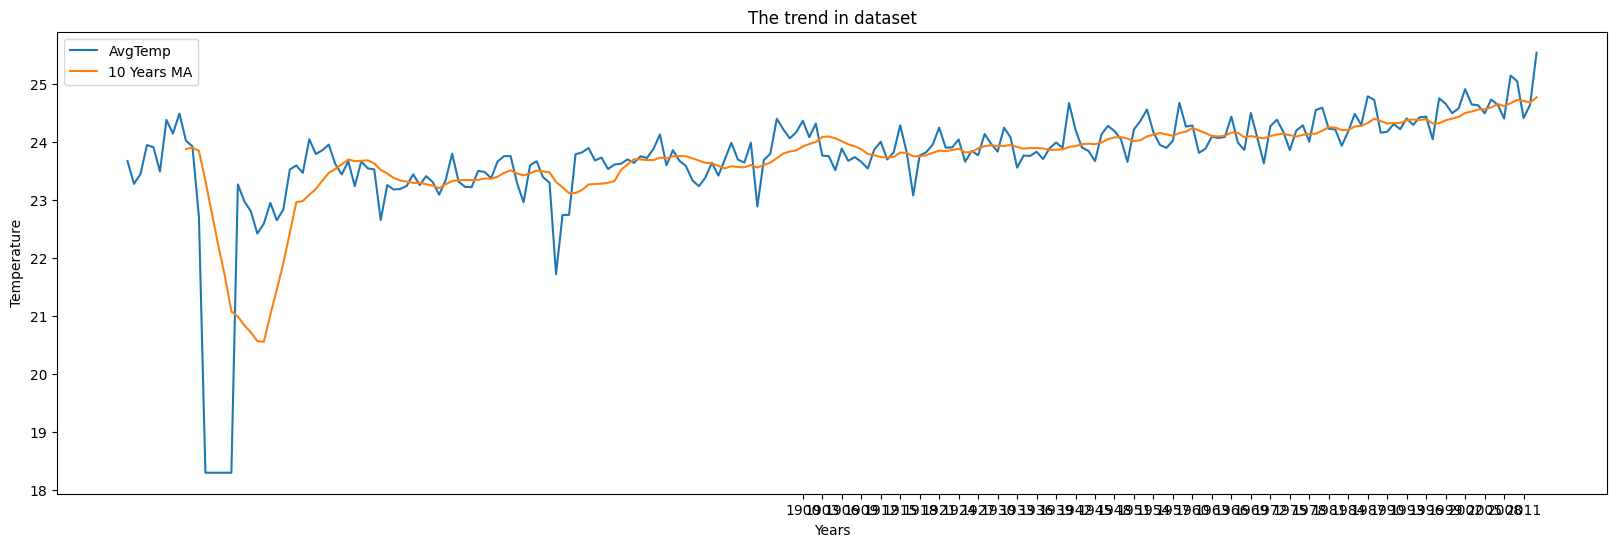

In [ ]:
year_avg = pd.pivot_table(india, values='AvgTemp', index='year', aggfunc='mean')
year_avg['10 Years MA'] = year_avg['AvgTemp'].rolling(10).mean()
year_avg[['AvgTemp','10 Years MA']].plot(figsize=(20,6))
plt.title('The trend in dataset')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1900,2012,3)])
plt.show()

ARIMA MODEL

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.9 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_copy['AverageTemperature'], trace=True,suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=123793.662, Time=80.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=177067.931, Time=0.94 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=155964.849, Time=2.63 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=162137.827, Time=6.58 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=177065.931, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=29.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=138225.963, Time=51.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=123576.448, Time=74.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=131560.403, Time=37.02 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=122616.385, Time=94.13 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=128513.304, Time=39.70 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=127108.652, Time=109.21 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=123577.916, Time=99.58 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=123752.764, Time=84.55 sec
 

In [ ]:
from pmdarima import auto_arima
stepwise_fit_india = auto_arima(test, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=382.925, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=384.217, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=384.154, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=380.973, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.395 seconds


In [ ]:
print(test.shape)
train2=test.iloc[:-30]
test2=test.iloc[-30:]
print(train2.shape,test2.shape)

(218, 1)
(188, 1) (30, 1)


In [ ]:
df_copy.columns

Index(['AverageTemperature', 'AverageTemperatureUncertainty', 'Country',
       'Year', 'Month', 'scores', 'anomaly_value'],
      dtype='object')

In [ ]:
df_copy.drop('anomaly_value',axis=1,inplace=True)
df_copy.drop('scores',axis=1,inplace=True)

In [ ]:
df_copy.columns

Index(['AverageTemperature', 'AverageTemperatureUncertainty', 'Country',
       'Year', 'Month'],
      dtype='object')

In [ ]:
print(df_copy.shape)
train1=df_copy.iloc[:-30]
test1=df_copy.iloc[-30:]
print(train1.shape,test1.shape)

(31900, 5)
(31870, 5) (30, 5)


In [ ]:
test1=test1.set_index('Year')
test1

,AverageTemperature,AverageTemperatureUncertainty,Country,Month
Year,,,,
2011,8.582,0.158,United States,4
2011,13.759,0.183,United States,5
2011,19.578,0.251,United States,6
2011,22.722,0.220,United States,7
2011,21.915,0.132,United States,8
2011,17.148,0.110,United States,9
2011,10.490,0.134,United States,10
2011,2.966,0.186,United States,11
2011,-0.635,0.253,United States,12


In [ ]:
train1=train1.set_index('Year')
train1

,AverageTemperature,AverageTemperatureUncertainty,Country,Month
Year,,,,
1832,24.935,1.372,Brazil,1
1832,24.505,1.953,Brazil,2
1832,24.617,1.359,Brazil,3
1832,23.990,2.013,Brazil,4
1832,23.124,1.592,Brazil,5
...,...,...,...,...
2010,3.601,0.155,United States,11
2010,-2.942,0.208,United States,12
2011,-3.507,0.208,United States,1


In [ ]:

model1=ARIMA(train1['AverageTemperature'],order=(5,1,2))
model1=model1.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                31870
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -61590.108
Date:                Fri, 08 Sep 2023   AIC                         123196.217
Time:                        11:06:44   BIC                         123263.172
Sample:                             0   HQIC                        123217.638
                              - 31870                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3954      0.007    199.513      0.000       1.382       1.409
ar.L2         -0.7224      0.009    -79.976      0.000      -0.740      -0.705
ar.L3         -0.0362      0.008     -4.365      0.0



 * The ARIMA model has been successfully fit to the data.   
 * The Ljung-Box Q-statistic (Ljung-Box (L1) (Q)) tests the residuals for autocorrelation. In this case, it's 0 with a probability (Prob(Q)) of 0.98. This suggests that there's no significant autocorrelation in the residuals.


* The Jarque-Bera statistic (JB) tests for normality of the residuals. The obtained JB value is 340082.47, and the corresponding probability (Prob(JB)) is  zero, indicating non-normality of residuals.


*   The Heteroskedasticity test (H) tests for constant variance of residuals. The obtained H value is 1.33, and the probability (Prob(H)) is zero, suggesting that the residuals may not have constant variance.








In [ ]:
train2

,AvgTemp
year,
1796,23.675250
1797,23.280750
1798,23.449083
1799,23.949417
1800,23.911917
...,...
1979,24.553583
1980,24.593083
1981,24.228417


In [ ]:
test2

,AvgTemp
year,
1984,24.185083
1985,24.486333
1986,24.294500
1987,24.789083
1988,24.727750
1989,24.162333
1990,24.178167
1991,24.311750
1992,24.222917


In [ ]:
model2 = ARIMA(train2['AvgTemp'], order=(0, 1, 0))
model2 = model2.fit()
print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:                AvgTemp   No. Observations:                  188
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -172.349
Date:                Fri, 08 Sep 2023   AIC                            346.699
Time:                        11:08:53   BIC                            349.930
Sample:                             0   HQIC                           348.008
                                - 188                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.3699      0.009     42.310      0.000       0.353       0.387
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):             10278.16
Prob(Q):                              0.50   Pr



* The ARIMA model has been successfully fit to the 'AvgTemp' data subset (train2).



<Axes: xlabel='year'>

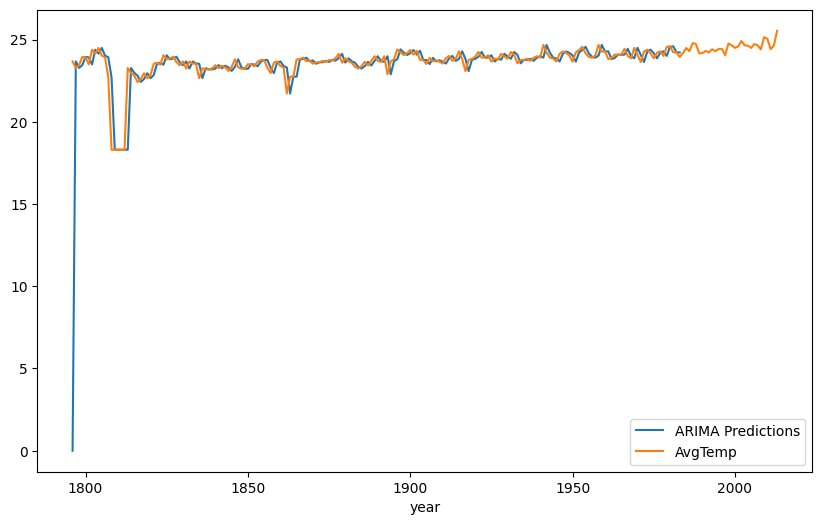

In [ ]:
pred2=model2.predict(typ='levels').rename('ARIMA Predictions')
pred2.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [ ]:
pred2

year
1796     0.000000
1797    23.675250
1798    23.280750
1799    23.449083
1800    23.949417
          ...    
1979    24.007333
1980    24.553583
1981    24.593083
1982    24.228417
1983    24.218250
Name: ARIMA Predictions, Length: 188, dtype: float64

In [ ]:
train2

,AvgTemp
year,
1796,23.675250
1797,23.280750
1798,23.449083
1799,23.949417
1800,23.911917
...,...
1979,24.553583
1980,24.593083
1981,24.228417


In [ ]:
print(train2['AvgTemp'].mean())
model2 = ARIMA(train2['AvgTemp'], order=(0, 1, 0))
model2 = model2.fit()
pred2 = model2.predict(start=train2.index.min(), end=train2.index.max(), typ='levels')
rmse = sqrt(mean_squared_error(pred2, train2['AvgTemp']))
print(rmse)

23.594804078014185
1.0421804163944917




* The mean 'AvgTemp' value in the 'train2' subset is around 23.59, which provides an understanding of the central tendency of the temperature data in this subset.
* The RMSE value of approximately 1.04 indicates the average prediction error between the predicted and actual 'AvgTemp' values.RMSE of around 1.04 might be considered reasonable for temperature data.



In [ ]:
model2 = ARIMA(test2['AvgTemp'], order=(0, 1, 0))
model2 = model2.fit()
print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:                AvgTemp   No. Observations:                   30
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -10.991
Date:                Fri, 08 Sep 2023   AIC                             23.983
Time:                        11:09:13   BIC                             25.350
Sample:                             0   HQIC                            24.411
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1249      0.029      4.274      0.000       0.068       0.182
Ljung-Box (L1) (Q):                   1.58   Jarque-Bera (JB):                 1.43
Prob(Q):                              0.21   Pr

<Axes: xlabel='year'>

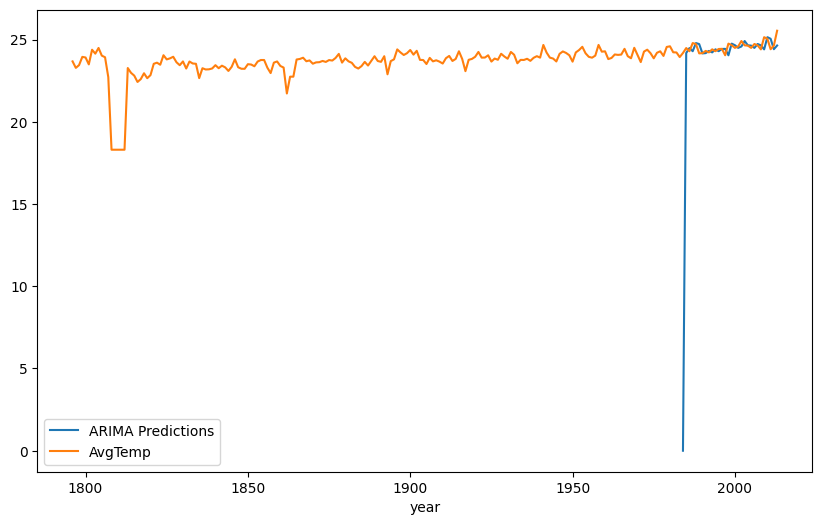

In [ ]:
pred3=model2.predict(typ='levels').rename('ARIMA Predictions')
pred3.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [ ]:
pred3

year
1984     0.000000
1985    24.185083
1986    24.486333
1987    24.294500
1988    24.789083
1989    24.727750
1990    24.162333
1991    24.178167
1992    24.311750
1993    24.222917
1994    24.408667
1995    24.296417
1996    24.429750
1997    24.436917
1998    24.047333
1999    24.755417
2000    24.659833
2001    24.498000
2002    24.581917
2003    24.913000
2004    24.649917
2005    24.634583
2006    24.495417
2007    24.732083
2008    24.649917
2009    24.406000
2010    25.146667
2011    25.050833
2012    24.415583
2013    24.640833
Name: ARIMA Predictions, dtype: float64

In [ ]:
print(test2['AvgTemp'].mean())
pred3 = model2.predict(start=test2.index.min(), end=test2.index.max(), typ='levels')
rmse = sqrt(mean_squared_error(pred3, test2['AvgTemp']))
print(rmse)

24.558237037037035
1.0314268110553368




* RMSE value suggests that, on average, your ARIMA model's predictions deviate from the actual temperature values by about 1.03 units.




In [ ]:
index_future_dates=pd.date_range(start='2016-12-31',end='2017-01-29')
#print(index_future_dates)
pred=model2.predict(typ='levels').rename('Future ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

import pandas as pd

# Assuming you have already defined index_future_dates and pred as in your previous code

# Create a DataFrame with the predicted values and the new index
result_df = pd.DataFrame({'Future ARIMA Predictions': pred}, index=index_future_dates)

print(result_df)


2016-12-31     0.000000
2017-01-01    24.185083
2017-01-02    24.486333
2017-01-03    24.294500
2017-01-04    24.789083
2017-01-05    24.727750
2017-01-06    24.162333
2017-01-07    24.178167
2017-01-08    24.311750
2017-01-09    24.222917
2017-01-10    24.408667
2017-01-11    24.296417
2017-01-12    24.429750
2017-01-13    24.436917
2017-01-14    24.047333
2017-01-15    24.755417
2017-01-16    24.659833
2017-01-17    24.498000
2017-01-18    24.581917
2017-01-19    24.913000
2017-01-20    24.649917
2017-01-21    24.634583
2017-01-22    24.495417
2017-01-23    24.732083
2017-01-24    24.649917
2017-01-25    24.406000
2017-01-26    25.146667
2017-01-27    25.050833
2017-01-28    24.415583
2017-01-29    24.640833
Freq: D, Name: Future ARIMA Predictions, dtype: float64
            Future ARIMA Predictions
2016-12-31                  0.000000
2017-01-01                 24.185083
2017-01-02                 24.486333
2017-01-03                 24.294500
2017-01-04                 24.789083
20



*    Predicted data represents the forecasted values of the average temperature for the specified time period.
*  Each value in the "Future ARIMA Predictions" column corresponds to the average temperature prediction for a specific date.



LSTM MODEL

In [ ]:
feature_data = df_copy['AverageTemperature'].values.reshape(-1,1)

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feature_data)

In [ ]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Adjust this based on your preference
X, y = create_sequences(scaled_data, sequence_length)


In [ ]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size],y[train_size:]

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50,batch_size=32)

Epoch 1/50
798/798 [==============================] - 9s 9ms/step - loss: 0.0182
Epoch 2/50
798/798 [==============================] - 5s 6ms/step - loss: 0.0014
Epoch 3/50
798/798 [==============================] - 6s 7ms/step - loss: 0.0013
Epoch 4/50
798/798 [==============================] - 5s 6ms/step - loss: 0.0012
Epoch 5/50
798/798 [==============================] - 5s 7ms/step - loss: 0.0012
Epoch 6/50
798/798 [==============================] - 6s 7ms/step - loss: 0.0011
Epoch 7/50
798/798 [==============================] - 5s 6ms/step - loss: 0.0011
Epoch 8/50
798/798 [==============================] - 6s 7ms/step - loss: 0.0011
Epoch 9/50
798/798 [==============================] - 5s 6ms/step - loss: 0.0011
Epoch 10/50
798/798 [==============================] - 6s 8ms/step - loss: 0.0010
Epoch 11/50
798/798 [==============================] - 9s 11ms/step - loss: 9.9706e-04
Epoch 12/50
798/798 [==============================] - 9s 12ms/step - loss: 9.7786e-04
Epoch 13/50
798



* The code is training a model that utilizes an LSTM layer, a type of recurrent neural network (RNN), to capture patterns within sequential data.  
*  The model is being optimized using the Adam optimizer, and the loss function used is mean squared error (MSE), a common choice for regression problems.


* The model is trained for 50 epochs, which means it goes through the entire training dataset 50 times.
*  Decreasing loss values over epochs show the model's learning progress, effectively fitting data and capturing patterns.
* The lower the loss, the better the model's predictions match the actual values in the training dataset.









In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE or other appropriate evaluation metrics
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print("RMSE:",rmse)

200/200 [==============================] - 1s 2ms/step
RMSE: 11.534951026112255


*The calculated root mean squared error (RMSE) of approximately 11.534951026112255 indicates the average magnitude of error between the predicted and actual values.


# **INFERENCE**



* The provided analyses involve a mix of statistical tests, anomaly detection, and time series forecasting using ARIMA and LSTM models.  

*   We have got prediction values from both ARIMA Model and LSTM Model and the RMSE values are 1.03 and 11.534951026112255 respectively.
*   This shows that the ARIMA Model is more accurate than LSTM Model.




